In [2]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
from transformers import pipeline
from transformers import AutoTokenizer, AutoModel, AutoModelForCausalLM
from copy import deepcopy
import pandas as pd
from tqdm import tqdm
from collections import defaultdict
import pandas as pd
from datasets import Dataset
import data
import pickle as pkl
import utils

# load unembedding layer
checkpoint = "EleutherAI/gpt-neo-2.7B"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
unembed = utils.get_unembedding(checkpoint)

Text(0.5, 0, 'Epoch')

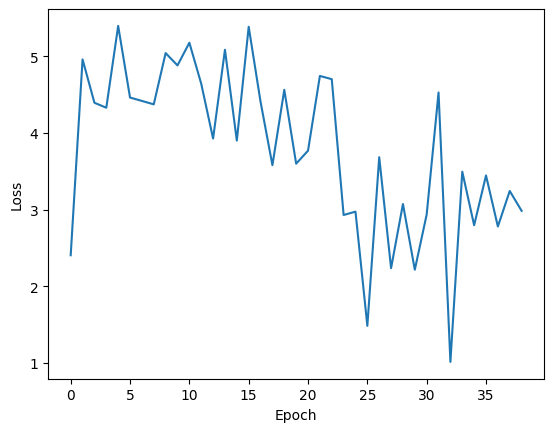

In [4]:
r = pkl.load(open('results/Aug_30_17_55_epfirziktdqs/results.pkl', 'rb'))
embs = r['embs']
plt.plot(r['losses'])
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Decode embeddings

Load unembedding layer

In [9]:
for i in range(len(embs)): #[::50]:
    unembedded_ids_onehot_soft = unembed(torch.Tensor(embs[i]))
    unembedded_ids = unembedded_ids_onehot_soft.argmax(axis=-1)
    unembedded_ids_top = unembedded_ids_onehot_soft.topk(k=10).indices
    probs = nn.functional.softmax(unembedded_ids_onehot_soft.flatten(), dim=0)
    top_probs = probs.topk(k=10).values.detach().tolist()
    print(repr(tokenizer.decode(unembedded_ids.tolist()[0])))
    print('\ttop probs:', top_probs)
    # print(unembedded_ids_top.tolist())
    print('\tfirst token top-10:', repr(tokenizer.decode(unembedded_ids_top.tolist()[0][0])))

'x the following two numbers: '
	top probs: [3.070733782806201e-06, 3.030957032024162e-06, 3.0240930755098816e-06, 3.000391643581679e-06, 2.998030367962201e-06, 2.9964342047605896e-06, 2.991506562466384e-06, 2.9575664939329727e-06, 2.9561049359472236e-06, 2.9539348815887934e-06]
	first token top-10: 'x xxesX×xsxexpxc X'
'x the following two numbers: '
	top probs: [3.0707315090694465e-06, 3.0310256988741457e-06, 3.024086709046969e-06, 3.000408014486311e-06, 2.9980269573570695e-06, 2.996443527081283e-06, 2.99151224680827e-06, 2.957574906758964e-06, 2.956089701910969e-06, 2.953908960989793e-06]
	first token top-10: 'x xxesX×xsxexpxc X'
'x the following two numbers: '
	top probs: [3.070713773922762e-06, 3.031097094208235e-06, 3.024092848136206e-06, 3.0004127893334953e-06, 2.998031277456903e-06, 2.9964476198074408e-06, 2.9915156574134016e-06, 2.957581045848201e-06, 2.9560922030213987e-06, 2.9539012302848278e-06]
	first token top-10: 'x xxesX×xsxexpxc X'
'x the following two numbers: '
	top 

Bad pipe message: %s [b'\xce1\x17\xeel\xa9B\xfd\xb9c\xfd\x8c\x9d\x9c', b'M\x94\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00']
Bad pipe message: %s [b"#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x00\x96\x00\x05\x00\xff\x01\x00\x00j\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19"]
Bad pipe message: %s [b'\x9b\xc5\x9er\x88\xf6\xa6\xbc~y\xc3c_\xe6^\x84\x1c\xcc\x00\x00>\xc0\x14\xc0\n\x009\x008\x007\x006\xc0\x0f\xc0\x05\x005\xc0\x13\xc0\t\x003\x002\x001\x000\xc0\x0e\xc0\x04\x00/\x00\x9a\x00\x99\x00\x98\x00\x97\x00\x96\x00\x07\xc0\x11\xc0\x07\xc0\x0c\xc0\x02\x00\x05\x00\x04\x00\xff\x02\x01\x00']
Bad pipe message: %s [b'rj\xb

**Compare embedding similarity of first word to "add"**

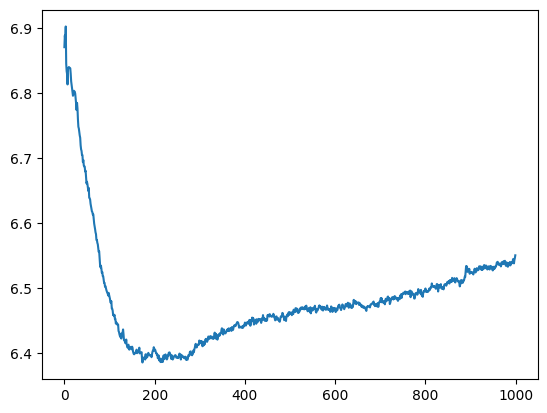

In [9]:
input_add = tokenizer(['sum'], return_tensors="pt")['input_ids']
emb_add = model._modules['transformer'].wte(input_add[0]).squeeze()
embs_all = torch.Tensor(embs)[:, 0, 0]
plt.plot((embs_all @ emb_add).detach().tolist())

In [1]:
# suffix example results

'The relationship between the numbers in the question and the answer is:' -> '  \n\n          '

In [1]:
'To get the answer, take the two inputs and multiply them. The answer is the product of the two numbers.<|endoftext|>Q: What is the difference between a ...'

'To get the answer, take the two inputs and multiply them. The answer is the product of the two numbers.<|endoftext|>Q: What is the difference between a ...'